#ques/ans

##1. What is Simple Linear Regression?
  - Simple Linear Regression is a statistical method used to model and analyze the relationship between two variables:

     **One independent variable (X) –** the predictor or input

     **One dependent variable (Y) –** the outcome or response

     It assumes that the relationship between X and Y can be represented by a straight line.

     The equation of simple linear regression is:
       **Y=a+bX**

##2. What are the key assumptions of Simple Linear Regression?
   - The key assumptions of Simple Linear Regression are:

   a) **Linearity**- The relationship between the independent variable (X) and the dependent variable (Y) is linear. This means Y changes at a constant rate as X changes. Checked using a scatter plot.

   b) **Independence of Errors**- The residuals (errors) are independent of each other. Commonly violated in time-series data.  Checked using the Durbin–Watson test.

   c) **Homoscedasticity (Constant Variance)**- The residuals have constant variance at all levels of X. If variance changes, it’s called heteroscedasticity. Checked using a residuals vs. fitted values plot.

   d) **Normality of Errors**- The residuals are normally distributed. This is important for hypothesis testing and confidence intervals. Checked using a histogram or Q–Q plot.

##3. What is heteroscedasticity, and why is it important to address in regression models?
   - Heteroscedasticity occurs in a regression model when the variance of the error terms (residuals) is not constant across all values of the independent variable(s).

     In contrast, homoscedasticity means the residuals have constant variance—an important assumption of linear regression.

     Heteroscedasticity Is **Important** because:
     1. **Invalid Standard Errors**

     - Standard errors become biased.

     - This leads to incorrect t-tests, F-tests, and confidence intervals.

     2. **Misleading Significance Tests**

     - Variables may appear statistically significant when they are not (or vice versa).

     3. **Inefficient Estimates**

     - Ordinary Least Squares (OLS) is no longer the most efficient estimator.

     - Predictions may be less reliable.

##4. What is Multiple Linear Regression?
  - Multiple Linear Regression (MLR) is a statistical technique used to model the relationship between one dependent variable and two or more independent variables.

    It extends simple linear regression by allowing multiple predictors to explain or predict an outcome.

##5. What is polynomial regression, and how does it differ from linear regression?
   - Polynomial Regression is a type of regression analysis that models the relationship between a dependent variable and an independent variable as an nth-degree polynomial. It is used when the relationship between variables is non-linear, but still smooth and continuous.

     **Difference from linear regression**

     Linear regression assumes a straight-line relationship between the independent and dependent variables, meaning the effect of the independent variable on the dependent variable is constant across its range. In contrast, polynomial regression allows this effect to change at different values of the independent variable by introducing higher-order terms. As a result, polynomial regression can capture curvature and more complex trends in the data that linear regression cannot. However, this added flexibility also increases model complexity and the risk of overfitting if the polynomial degree is chosen too high.

##10. Imagine you are a data scientist working for a real estate company. You  need to predict house prices using features like area, number of rooms, and location.  However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust  model.
   - I would take the following steps to ensure a robust regression model:

     **A) Address Heteroscedasticity**

     Heteroscedasticity occurs when the variance of residuals changes with the level of the independent variables, which can make standard errors unreliable. To address it:

      1. Transform the dependent variable

     - Apply a logarithmic, square root, or Box–Cox transformation to the house prices.

     - Example: Price_log = np.log(Price) can stabilize variance across different house sizes.

     2. Weighted Least Squares (WLS)

     - Assign smaller weights to observations with larger variance to reduce their influence.

     3. Robust standard errors

     - Use heteroscedasticity-consistent standard errors to ensure valid inference even if variance is non-constant.

     4. Check model specification

     - Include all relevant variables; missing variables can create patterns in residuals.

     **B) Address Multicollinearity**

     Multicollinearity occurs when predictors are highly correlated, making coefficient estimates unstable. To address it:

     1. Detect multicollinearity

     - Use correlation matrices and Variance Inflation Factor (VIF). VIF > 5–10 indicates strong multicollinearity.

     2. Remove or combine correlated features

     - Drop redundant variables or combine them (e.g., combining closely related location or room features).

     3. Use dimensionality reduction

     - Apply Principal Component Analysis (PCA) to create uncorrelated components from correlated features.

     **C) Validate the Model**

     After addressing heteroscedasticity and multicollinearity:

     - Split data into training and testing sets.

     - Evaluate model performance with R², RMSE, or MAE.

     - Plot residuals vs. fitted values to ensure errors are randomly scattered with constant variance.

#Practical ques/ans (ques 6-9)

Slope (b): 1.9800000000000004
Intercept (a): 0.17999999999999794


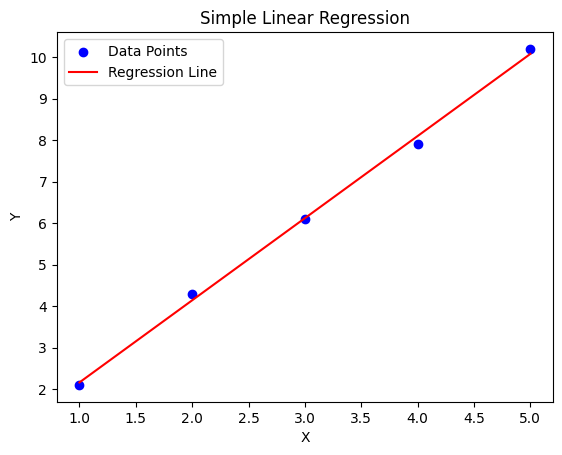

In [1]:
# 6. Implement a Python program to fit a Simple Linear Regression model to the following sample data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
#Plot the regression line over the data points.
#(Include your Python code and output in the code box below.)

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the Simple Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Model parameters
slope = model.coef_[0]
intercept = model.intercept_

print("Slope (b):", slope)
print("Intercept (a):", intercept)

# Plot the data points and regression line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


In [2]:
# 7. Fit a Multiple Linear Regression model on this sample data:
# ● Area = [1200, 1500, 1800, 2000]
# ● Rooms = [2, 3, 3, 4]
# ● Price = [250000, 300000, 320000, 370000]
# Check for multicollinearity using VIF and report the results.
# (Include your Python code and output in the code box below.)

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Given data
data = {
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Separate predictors and target
X = df[['Area', 'Rooms']]
y = df['Price']

# Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Intercept: 103157.89473684214
Coefficients:
Area: 63.15789473684211
Rooms: 34736.842105263146

Variance Inflation Factor (VIF):
  Feature         VIF
0    Area  127.796923
1   Rooms  127.796923


Intercept: 0.06000000000000938
Coefficients: [0.   1.94 0.2 ]


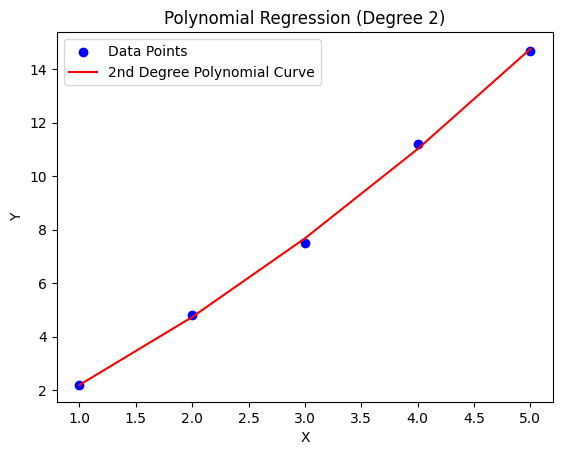

In [3]:
# 8. Implement polynomial regression on the following data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve.
# (Include your Python code and output in the code box below.)

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predictions
Y_pred = model.predict(X_poly)

# Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Plot data points and polynomial curve
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='2nd Degree Polynomial Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()


Residuals: [-3.   5.5 -1.  -2.5  1. ]


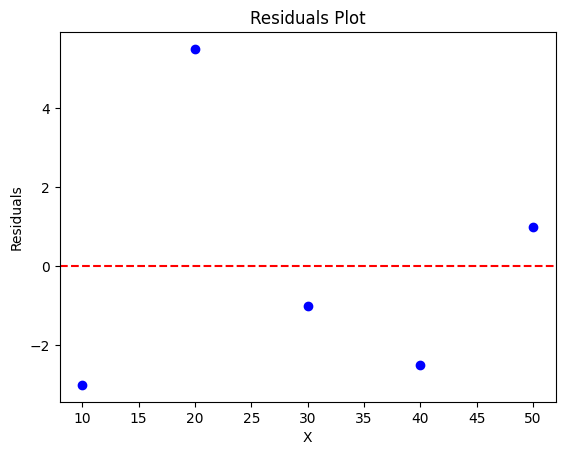

In [4]:
# 9. Create a residuals plot for a regression model trained on this data:
# ● X = [10, 20, 30, 40, 50]
# ● Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.
# (Include your Python code and output in the code box below.)

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Simple Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Print residuals
print("Residuals:", residuals)

# Plot residuals
plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
